# 

Diskon yang diberikan: 31.222222222222225%


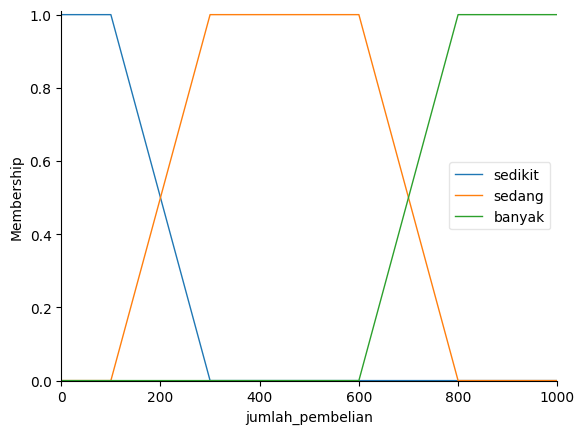

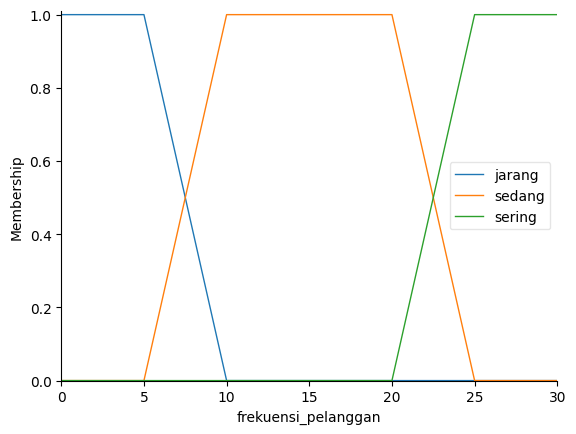

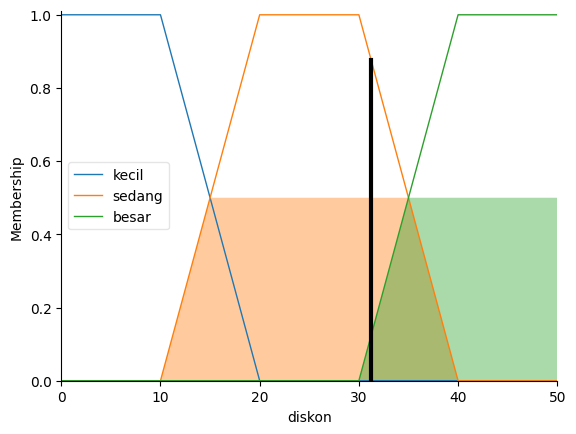

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisi variabel fuzzy
# Input: Jumlah Pembelian dan Frekuensi Pelanggan
# Output: Diskon

jumlah_pembelian = ctrl.Antecedent(np.arange(0, 1001, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 31, 1), 'frekuensi_pelanggan')
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# Himpunan fuzzy untuk jumlah pembelian
jumlah_pembelian['sedikit'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 100, 300])
jumlah_pembelian['sedang'] = fuzz.trapmf(jumlah_pembelian.universe, [100, 300, 600, 800])
jumlah_pembelian['banyak'] = fuzz.trapmf(jumlah_pembelian.universe, [600, 800, 1000, 1000])

# Himpunan fuzzy untuk frekuensi pelanggan
frekuensi_pelanggan['jarang'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 5, 10])
frekuensi_pelanggan['sedang'] = fuzz.trapmf(frekuensi_pelanggan.universe, [5, 10, 20, 25])
frekuensi_pelanggan['sering'] = fuzz.trapmf(frekuensi_pelanggan.universe, [20, 25, 30, 30])

# Himpunan fuzzy untuk diskon
diskon['kecil'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['sedang'] = fuzz.trapmf(diskon.universe, [10, 20, 30, 40])
diskon['besar'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# Definisi aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['jarang'], diskon['kecil'])
rule2 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['sedang'], diskon['kecil'])
rule3 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['sering'], diskon['sedang'])
rule4 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['jarang'], diskon['kecil'])
rule5 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sedang'], diskon['sedang'])
rule6 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sering'], diskon['besar'])
rule7 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['jarang'], diskon['sedang'])
rule8 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sedang'], diskon['besar'])
rule9 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sering'], diskon['besar'])

# Membuat sistem kontrol
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
diskon_simulasi = ctrl.ControlSystemSimulation(control_system)

# Simulasi
# Input nilai jumlah pembelian dan frekuensi pelanggan
diskon_simulasi.input['jumlah_pembelian'] = 700  # Contoh: jumlah pembelian 700
 
diskon_simulasi.input['frekuensi_pelanggan'] = 15  # Contoh: frekuensi pelanggan 15

# Hitung hasil diskon
diskon_simulasi.compute()

# Menampilkan hasil diskon
print(f"Diskon yang diberikan: {diskon_simulasi.output['diskon']}%")

# Visualisasi
jumlah_pembelian.view()
frekuensi_pelanggan.view()
diskon.view(sim=diskon_simulasi)